In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

 ## Data augmentation definition :
* Data augmentation is the process by which we create new synthetic training samples by adding small perturbations on our initial training set.
* The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
* In order to this to work adding the perturbations must conserve the same label as the original training sample.
* In images data augmention can be performed by shifting the image, zooming, rotating ... 
* In our case we will add noise, stretch and roll, pitch shift ... 

In [4]:
#Import stuff

import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def load_audio_file(file_path):
    input_length = 100000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

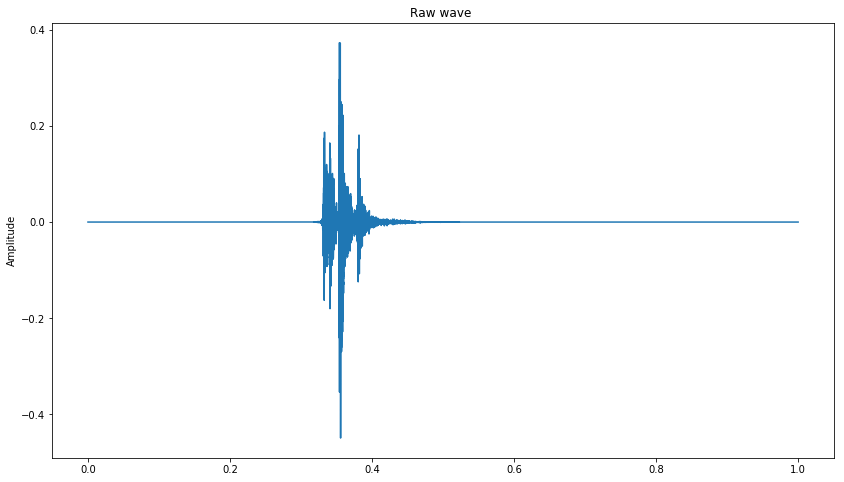

In [27]:
data = load_audio_file("./wav_files/Audio_19-02-16_20-48-08.wav")
plot_time_series(data)

In [28]:
#Hear it ! 
ipd.Audio(data, rate=16000)
librosa.output.write_wav('./file_trim_5s.wav', data, 16000)

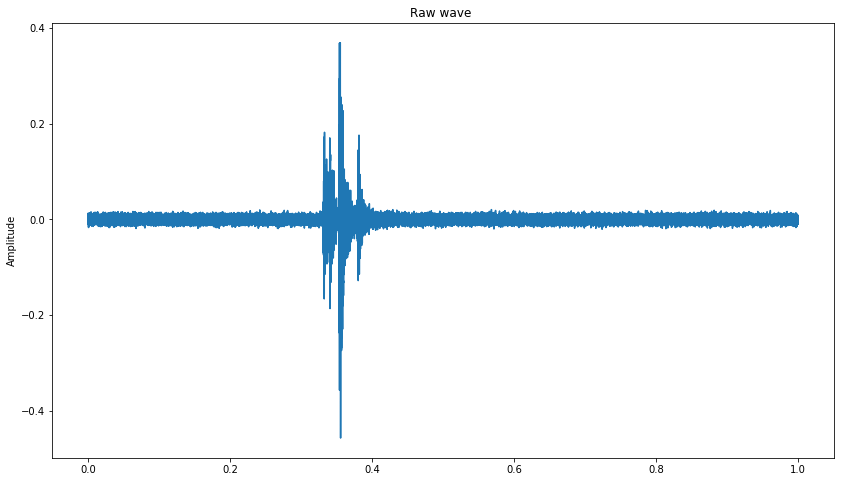

In [7]:
# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

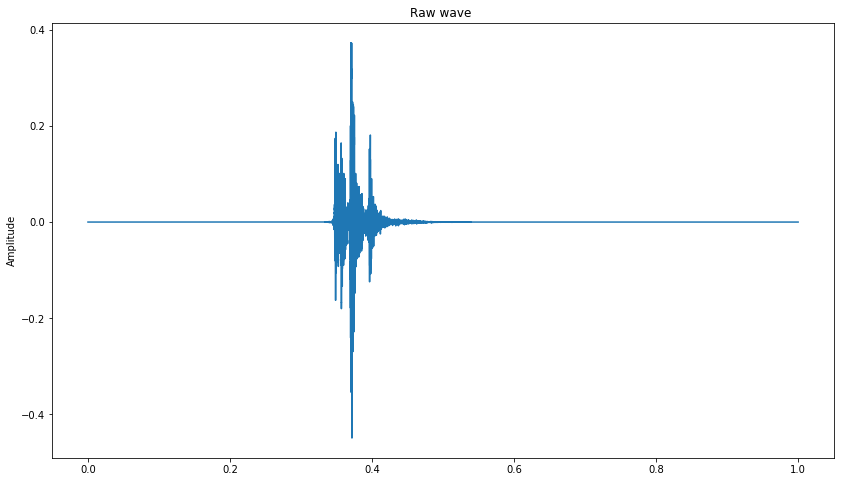

In [8]:
# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

This makes the sound deeper but we can still hear 'off' 


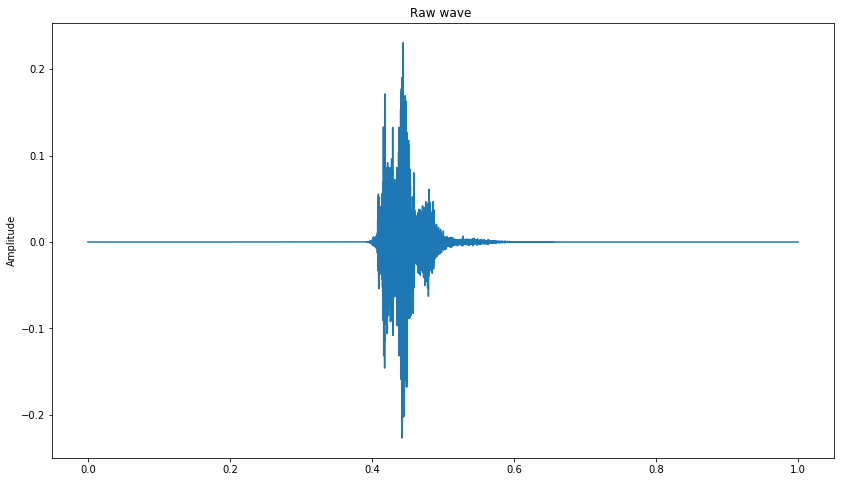

Higher frequencies  


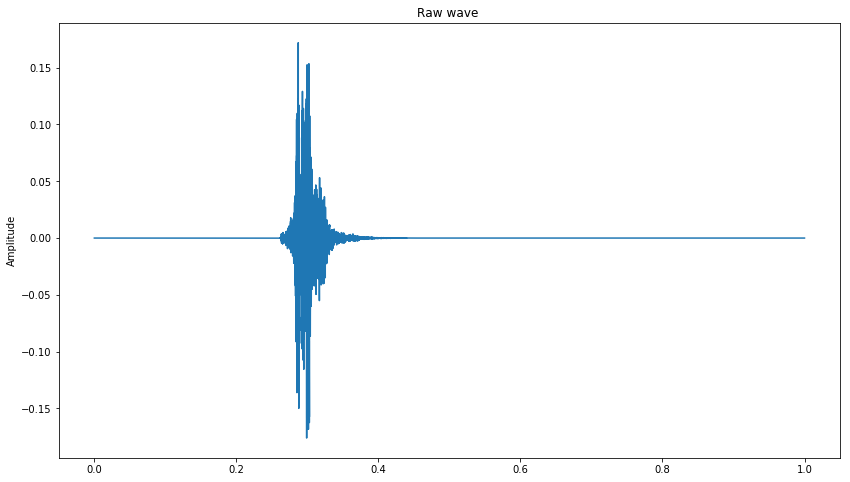

In [9]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 100000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 0.8)
print("This makes the sound deeper but we can still hear 'off' ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

In [ ]:
# You can now plug all those transfo`bzrmations in your keras data generator and see your LB rank go up :D

## Sound Mixing

In [12]:
from pydub import AudioSegment

sound1 = AudioSegment.from_file("./wav_files/Audio_19-02-16_20-53-43.wav", format="wav")
sound2 = AudioSegment.from_file("./wav_files/Audio_19-02-16_20-55-38.wav", format="wav")

In [14]:
from pydub import AudioSegment

def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

def remove_silence(sound):
    start_trim = detect_leading_silence(sound)
    end_trim = detect_leading_silence(sound.reverse())
    duration = len(sound)    
    trimmed_sound = sound[start_trim:duration-end_trim]

    return(trimmed_sound)
    

#sound_i = AudioSegment.from_file("./wav_files/Audio_19-02-16_20-48-08.wav", format="wav")
#sound_0 = remove_silence(sound_i)

#sound.export("./original.wav", format="wav")


In [ ]:
sound1 = remove_silence(sound1)
sound2 = remove_silence(sound2)
played_togther = sound2.overlay(sound1)
played_togther.export("./crisp.wav", format="wav")

In [ ]:
csv_path = r'./pred_data_dump/*.csv'
all_files = glob.glob(csv_path)
li_csv = []


for filename in all_files:
    df_x = pd.read_csv(filename)
    df_pred = predict_pipeline(df_x)
    df_pred['csn'] = df_pred.index
    df_pred = df_pred[['csn','target','pred','prob']]
    li_csv.append(df_pred)
    print('done')

    
final_pred_frame = pd.concat(li_csv, axis=0, ignore_index=True)

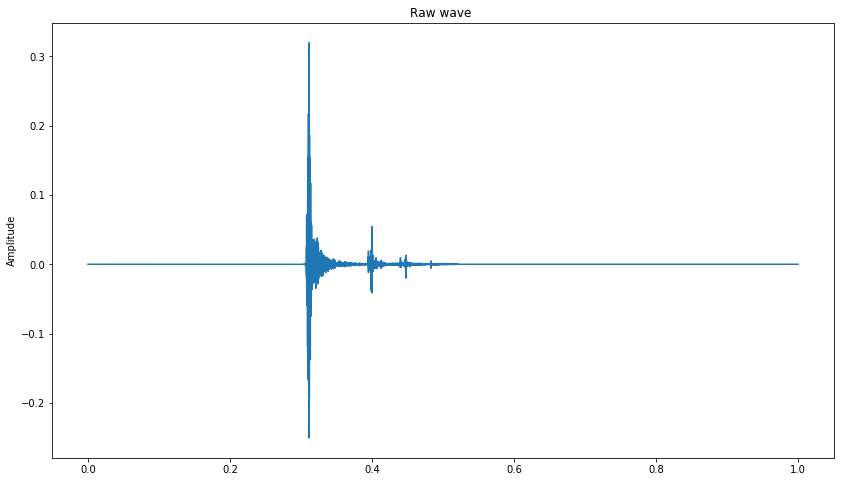

In [18]:
sound1 = load_audio_file("./wav_files/Audio_19-02-16_20-53-43.wav")
sound2 = load_audio_file("./wav_files/Audio_19-02-16_20-55-38.wav")
plot_time_series(sound1)

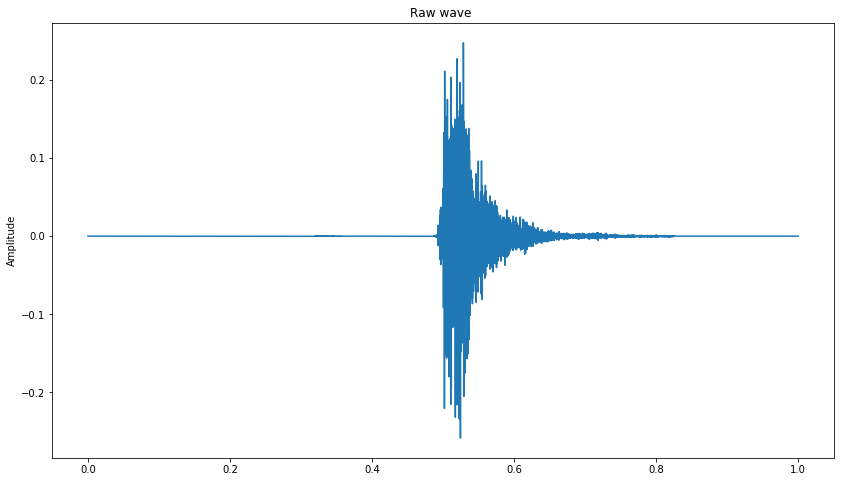

In [19]:
plot_time_series(sound2)

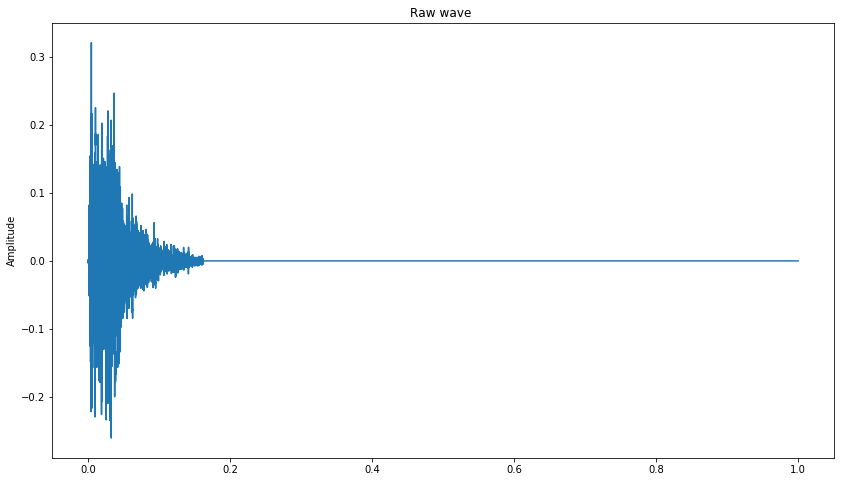

In [21]:
data = load_audio_file("./crisp.wav")
plot_time_series(data)